In [7]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [18]:
df = pd.read_csv("../data/adult.csv", index_col=0)
df_cleaned = df.replace("?", pd.NA).dropna()


def check_salary_consistency(row):
    if row["salary"] == "<=50K" and row["salary K$"] <= 50:
        return True
    elif row["salary"] == ">50K" and row["salary K$"] > 50:
        return True
    return False


df_corrected = df_cleaned[df_cleaned.apply(check_salary_consistency, axis=1)]
df.head(20)

age         workclass     education         marital-status  \
0    39         State-gov     Bachelors          Never-married   
1    50  Self-emp-not-inc     Bachelors     Married-civ-spouse   
2    38           Private       HS-grad               Divorced   
3    53           Private          11th     Married-civ-spouse   
4    28           Private     Bachelors     Married-civ-spouse   
5    37           Private       Masters     Married-civ-spouse   
6    49           Private           9th  Married-spouse-absent   
7    52  Self-emp-not-inc       HS-grad     Married-civ-spouse   
8    31           Private       Masters          Never-married   
9    42           Private     Bachelors     Married-civ-spouse   
10   37           Private  Some-college     Married-civ-spouse   
11   30         State-gov     Bachelors     Married-civ-spouse   
12   23           Private     Bachelors          Never-married   
13   32           Private    Assoc-acdm          Never-married   
14   40           Private     Assoc-voc     Married-civ-spouse   
15   34           Private       7th-8th     Married-civ-spouse   
16   25  Self-emp-not-inc       HS-grad          Never-married   
17   32           Private       HS-grad          Never-married   
18   38           Private          11th     Married-civ-spouse   
19   43  Self-emp-not-inc       Masters               Divorced   

           occupation   relationship                race     sex  \
0        Adm-clerical  Not-in-family               White    Male   
1     Exec-managerial        Husband               White    Male   
2   Handlers-cleaners  Not-in-family               White    Male   
3   Handlers-cleaners        Husband               Black    Male   
4      Prof-specialty           Wife               Black  Female   
5     Exec-managerial           Wife               White  Female   
6       Other-service  Not-in-family               Black  Female   
7     Exec-managerial        Husband               White    Male   
8      Prof-specialty  Not-in-family               White  Female   
9     Exec-managerial        Husband               White    Male   
10    Exec-managerial        Husband               Black    Male   
11     Prof-specialty        Husband  Asian-Pac-Islander    Male   
12       Adm-clerical      Own-child               White  Female   
13              Sales  Not-in-family               Black    Male   
14       Craft-repair        Husband  Asian-Pac-Islander    Male   
15   Transport-moving        Husband  Amer-Indian-Eskimo    Male   
16    Farming-fishing      Own-child               White    Male   
17  Machine-op-inspct      Unmarried               White    Male   
18              Sales        Husband               White    Male   
19    Exec-managerial      Unmarried               White  Female   

    hours-per-week native-country salary  salary K$  
0               40  United-States  <=50K         39  
1               13  United-States  <=50K         35  
2               40  United-States  <=50K         27  
3               40  United-States  <=50K         43  
4               40           Cuba  <=50K         25  
5               40  United-States  <=50K         44  
6               16        Jamaica  <=50K         49  
7               45  United-States   >50K        307  
8               50  United-States   >50K        330  
9               40  United-States   >50K        303  
10              80  United-States   >50K        116  
11              40          India   >50K        279  
12              30  United-States  <=50K         27  
13              50  United-States  <=50K         28  
14              40              ?   >50K        325  
15              45         Mexico  <=50K         15  
16              35  United-States  <=50K         42  
17              40  United-States  <=50K         28  
18              50  United-States  <=50K         31  
19              45  United-States   >50K        151

# Task 1
Print the count of men and women in the dataset.

In [27]:
gender_counts = df_corrected["sex"].value_counts()
print(gender_counts)

sex
Male      21790
Female    10771
Name: count, dtype: int64


# Task 2
Find the average age of men in dataset

In [26]:
print(df_corrected[df_corrected["sex"] == "Male"]["age"].mean())

39.18400392541707


# Task 3
Get the percentage of people from Poland (native-country)

In [29]:
poland_count = df_corrected[df_corrected["native-country"] == "Poland"].shape[0]
total_count = len(df_corrected)
print((poland_count / total_count) * 100)

0.18566408063125786


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [30]:
mean_age_above_50k = df_corrected[df_corrected["salary"] == ">50K"]["age"].mean()
std_age_above_50k = df_corrected[df_corrected["salary"] == ">50K"]["age"].std()

mean_age_below_50k = df_corrected[df_corrected["salary"] == "<=50K"]["age"].mean()
std_age_below_50k = df_corrected[df_corrected["salary"] == "<=50K"]["age"].std()
print(mean_age_above_50k)
print(std_age_above_50k)
print(mean_age_below_50k)
print(std_age_below_50k)

43.95911028236548
10.269632835673852
36.60806038668668
13.464631257161633


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [31]:
higher_education = [
    "Bachelors",
    "Prof-school",
    "Assoc-acdm",
    "Assoc-voc",
    "Masters",
    "Doctorate",
]
without_higher_education_and_above_50k = df_corrected[
    (~df_corrected["education"].isin(higher_education))
    & (df_corrected["salary"] == ">50K")
]
print(without_higher_education_and_above_50k)

       age         workclass     education      marital-status  \
7       52  Self-emp-not-inc       HS-grad  Married-civ-spouse   
10      37           Private  Some-college  Married-civ-spouse   
55      43           Private  Some-college  Married-civ-spouse   
67      53           Private       HS-grad  Married-civ-spouse   
68      49      Self-emp-inc  Some-college  Married-civ-spouse   
...    ...               ...           ...                 ...   
32462   48      Self-emp-inc       HS-grad  Married-civ-spouse   
32518   57         Local-gov       HS-grad  Married-civ-spouse   
32519   46           Private  Some-college  Married-civ-spouse   
32557   40           Private       HS-grad  Married-civ-spouse   
32560   52      Self-emp-inc       HS-grad  Married-civ-spouse   

              occupation relationship   race     sex  hours-per-week  \
7        Exec-managerial      Husband  White    Male              45   
10       Exec-managerial      Husband  Black    Male           

# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [32]:
age_stats_by_education = df_corrected.groupby("education")["age"].describe()
print(age_stats_by_education)

               count       mean        std   min   25%   50%   75%   max
education                                                               
10th           820.0  37.897561  16.225795  17.0  23.0  36.0  52.0  90.0
11th          1048.0  32.363550  15.089307  17.0  18.0  28.5  43.0  90.0
12th           377.0  32.013263  14.373710  17.0  19.0  28.0  41.0  79.0
1st-4th        151.0  44.622517  14.929051  19.0  33.0  44.0  56.0  81.0
5th-6th        288.0  41.649306  14.754622  17.0  28.0  41.0  53.0  82.0
7th-8th        557.0  47.631957  15.737479  17.0  34.0  49.0  60.0  90.0
9th            455.0  40.303297  15.335754  17.0  28.0  38.0  53.0  90.0
Assoc-acdm    1008.0  37.286706  10.509755  19.0  29.0  36.0  44.0  90.0
Assoc-voc     1307.0  38.246366  11.181253  19.0  30.0  37.0  45.0  84.0
Bachelors     5044.0  38.641554  11.577566  19.0  29.0  37.0  46.0  90.0
Doctorate      375.0  47.130667  11.471727  24.0  39.0  47.0  54.0  80.0
HS-grad       9840.0  38.640955  13.067730  17.0  2

# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [34]:
def categorize_marital_status(status):
    if status.startswith("Married"):
        return "Married"
    else:
        return "Non-Married"


df_corrected["marital_category"] = df_corrected["marital-status"].apply(
    categorize_marital_status
)
salary_comparison = (
    df_corrected[df_corrected["sex"] == "Male"]
    .groupby(["marital_category", "salary"])
    .size()
    .unstack()
)
print(salary_comparison)

salary            <=50K  >50K
marital_category             
Married            7052  5723
Non-Married        6932   673


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [36]:
max_hours_per_week = df_corrected["hours-per-week"].max()
print(max_hours_per_week)
people_with_max_hours = df_corrected[
    df_corrected["hours-per-week"] == max_hours_per_week
].shape[0]
print(people_with_max_hours)

99
78


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

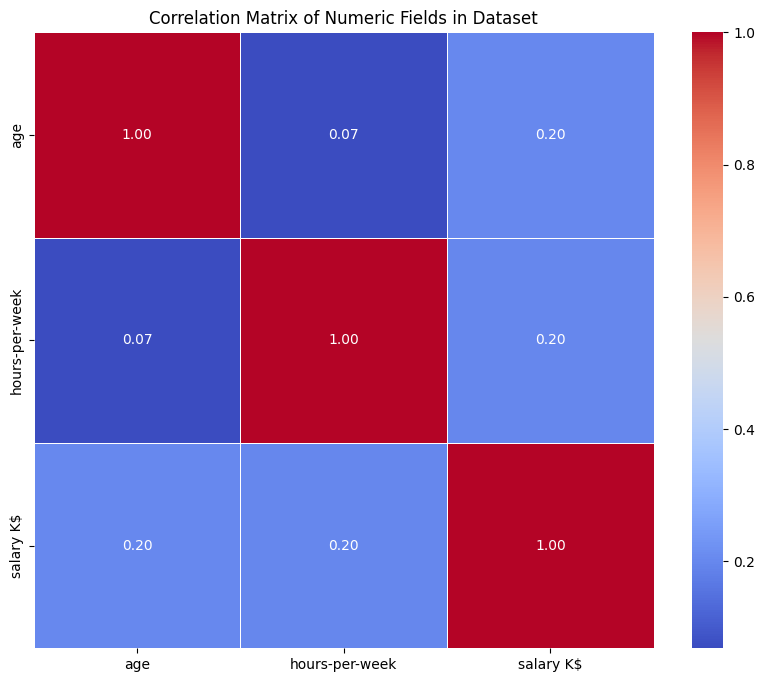

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ["age", "hours-per-week", "salary K$"]

df_cleaned = df[numeric_columns].apply(pd.to_numeric, errors="coerce").dropna()

correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Fields in Dataset")
plt.show()